In [50]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
df=pd.read_csv("data.csv")

In [52]:
df

,invoice_date,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,...,month,quarter,year,gender_encoded,category_encoded,payment_method_encoded,quantity_scaled,price_scaled,total_sales_scaled,age_group
0,2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,...,12,4,2021,1,4,2,-0.002426,1.180703,0.680349,19-25
1,2021-11-09,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,...,11,4,2021,1,1,0,-1.417837,-0.413498,-0.527823,19-25
2,2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,...,10,4,2021,0,0,0,0.705279,-0.667945,-0.541483,46-60
3,2022-03-13,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,...,3,1,2022,0,2,0,-1.417837,-0.689131,-0.589261,46-60
4,2021-01-13,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,...,1,1,2021,0,1,1,-0.710132,-0.094665,-0.314620,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85466,2021-10-09,I675411,C513603,Male,50,Toys,5,179.20,Cash,Metropol AVM,...,10,4,2021,1,7,0,1.412984,-0.541933,-0.386692,46-60
85467,2022-09-21,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,...,9,3,2022,0,5,1,1.412984,-0.670017,-0.529441,36-45
85468,2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,...,9,3,2021,1,3,0,-0.710132,-0.721219,-0.593936,26-35
85469,2021-03-28,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,...,3,1,2021,1,3,2,-0.710132,-0.721219,-0.593936,Above 60


In [65]:
df.set_index('invoice_date', inplace=True)

In [66]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,total_sales,...,month,quarter,year,gender_encoded,category_encoded,payment_method_encoded,quantity_scaled,price_scaled,total_sales_scaled,age_group
invoice_date,,,,,,,,,,,,,,,,,,,,,
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53,...,12,4,2021,1,4,2,-0.002426,1.180703,0.680349,19-25
2021-11-09,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08,...,11,4,2021,1,1,0,-1.417837,-0.413498,-0.527823,19-25
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,242.40,...,10,4,2021,0,0,0,0.705279,-0.667945,-0.541483,46-60
2022-03-13,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,40.66,...,3,1,2022,0,2,0,-1.417837,-0.689131,-0.589261,46-60
2021-01-13,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,1200.32,...,1,1,2021,0,1,1,-0.710132,-0.094665,-0.314620,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-09,I675411,C513603,Male,50,Toys,5,179.20,Cash,Metropol AVM,896.00,...,10,4,2021,1,7,0,1.412984,-0.541933,-0.386692,46-60
2022-09-21,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,293.25,...,9,3,2022,0,5,1,1.412984,-0.670017,-0.529441,36-45
2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,20.92,...,9,3,2021,1,3,0,-0.710132,-0.721219,-0.593936,26-35


In [67]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'shopping_mall', 'total_sales',
       'day_of_week', 'month', 'quarter', 'year', 'gender_encoded',
       'category_encoded', 'payment_method_encoded', 'quantity_scaled',
       'price_scaled', 'total_sales_scaled', 'age_group'],
      dtype='object')

In [73]:
df.index = pd.to_datetime(df.index, errors='coerce')


In [68]:
# ARIMA: Define the time series model
# We'll use 'total_sales' for forecasting
# You can adjust the order (p, d, q) based on your data after testing
model = ARIMA(df['total_sales'], order=(5, 1, 0))  # (p, d, q) values can be adjusted
model_fit = model.fit()


C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

In [69]:
# Forecasting the next 12 months (for example)
forecast = model_fit.forecast(steps=12)


C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [74]:
future_dates = pd.date_range(df.index[-1], periods=len(forecast) + 1, freq='M')[1:]

C:\Users\shobh\AppData\Local\Temp\ipykernel_20664\3812709298.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df.index[-1], periods=len(forecast) + 1, freq='M')[1:]


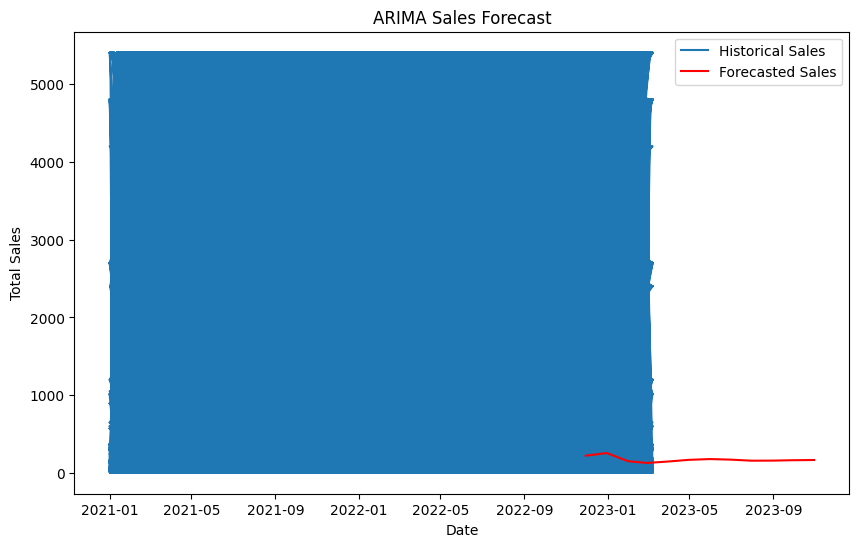

In [75]:
# Plot the historical and forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['total_sales'], label='Historical Sales')
plt.plot(future_dates, forecast, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('ARIMA Sales Forecast')
plt.legend()
plt.show()

In [76]:
print(df['total_sales'].describe())

count    85471.000000
mean      1137.152475
std       1552.912965
min          5.230000
25%        105.570000
50%        365.940000
75%       1200.320000
max       5401.530000
Name: total_sales, dtype: float64


In [77]:
print(df['total_sales'].isna().sum())

0


In [78]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,total_sales,...,month,quarter,year,gender_encoded,category_encoded,payment_method_encoded,quantity_scaled,price_scaled,total_sales_scaled,age_group
invoice_date,,,,,,,,,,,,,,,,,,,,,
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53,...,12,4,2021,1,4,2,-0.002426,1.180703,0.680349,19-25
2021-11-09,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08,...,11,4,2021,1,1,0,-1.417837,-0.413498,-0.527823,19-25
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,242.40,...,10,4,2021,0,0,0,0.705279,-0.667945,-0.541483,46-60
2022-03-13,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,40.66,...,3,1,2022,0,2,0,-1.417837,-0.689131,-0.589261,46-60
2021-01-13,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,1200.32,...,1,1,2021,0,1,1,-0.710132,-0.094665,-0.314620,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-09,I675411,C513603,Male,50,Toys,5,179.20,Cash,Metropol AVM,896.00,...,10,4,2021,1,7,0,1.412984,-0.541933,-0.386692,46-60
2022-09-21,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,293.25,...,9,3,2022,0,5,1,1.412984,-0.670017,-0.529441,36-45
2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,20.92,...,9,3,2021,1,3,0,-0.710132,-0.721219,-0.593936,26-35


In [79]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'shopping_mall', 'total_sales',
       'day_of_week', 'month', 'quarter', 'year', 'gender_encoded',
       'category_encoded', 'payment_method_encoded', 'quantity_scaled',
       'price_scaled', 'total_sales_scaled', 'age_group'],
      dtype='object')

In [57]:
 !pip install prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\shobh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\shobh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [58]:
from prophet import Prophet

In [59]:
# Prepare data for Prophet
prophet_df = df[['total_sales']].reset_index()
prophet_df.columns = ['ds', 'y']  # Prophet expects 'ds' as the date column and 'y' as the value column

In [60]:
print(df.index)


RangeIndex(start=0, stop=85471, step=1)


In [61]:
# Define and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_df)

C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])


DateParseError: day is out of range for month: 0, at position 0